In [1]:
# Get the imports; check if the gpu is available

import time
from typing import List, Dict

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import os
import numpy as np
from PIL import Image
from datetime import datetime

import torch
from denoising_diffusion_pytorch import Unet, GaussianDiffusion, Trainer

import matplotlib.pyplot as plt


import pandas as pd
import io
import re

import struct
import png



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Can I can use GPU now? -- {torch.cuda.is_available()}')

print(datetime.now())

C:\Users\Sarah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Can I can use GPU now? -- False
2025-04-11 09:11:55.608756


In [8]:
# Load your data set
# DO NOT USE


def save_images_from_dataloader(dataloader, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    saved = 0

    # Iterate over the DataLoader
    for batch_idx, (images, labels) in enumerate(dataloader):
        # Iterate over each image in the batch
        for i in range(images.size(0)):
            # Get the image tensor and convert it to a numpy array
            img_tensor = images[i]
            img_array = img_tensor.numpy()

            # Rescale the image array to [0, 255] and convert to uint8
            img_array = (img_array * 255).astype(np.uint8)
            print(img_array.shape)

            # Convert the numpy array to a PIL Image
            img = Image.fromarray(img_array[0], mode='L')  # 'L' mode for grayscale images


            # Define the file path and save the image
            file_path = os.path.join(output_folder, f'image_{batch_idx * dataloader.batch_size + i}.png')
            img.save(file_path)
            print(f'Saved {file_path}')
            saved += 1

            # Only save 100 images as this will take a while to train
            if saved >= 5000:
                return




In [13]:
# Load MNist

batch_size = 32
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                      torchvision.transforms.Normalize((0.1307,),(0.3081,))])

train_dataset = torchvision.datasets.MNIST('data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST('data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)



print(train_dataset)

AttributeError: 'DataLoader' object has no attribute 'shape'

In [9]:

# Specify the output folder
output_folder = './mnist_images'


# Save the images from the DataLoader
save_images_from_dataloader(train_loader, output_folder)

(1, 28, 28)
Saved ./mnist_images\image_0.png
(1, 28, 28)
Saved ./mnist_images\image_1.png
(1, 28, 28)
Saved ./mnist_images\image_2.png
(1, 28, 28)
Saved ./mnist_images\image_3.png
(1, 28, 28)
Saved ./mnist_images\image_4.png
(1, 28, 28)
Saved ./mnist_images\image_5.png
(1, 28, 28)
Saved ./mnist_images\image_6.png
(1, 28, 28)
Saved ./mnist_images\image_7.png
(1, 28, 28)
Saved ./mnist_images\image_8.png
(1, 28, 28)
Saved ./mnist_images\image_9.png
(1, 28, 28)
Saved ./mnist_images\image_10.png
(1, 28, 28)
Saved ./mnist_images\image_11.png
(1, 28, 28)
Saved ./mnist_images\image_12.png
(1, 28, 28)
Saved ./mnist_images\image_13.png
(1, 28, 28)
Saved ./mnist_images\image_14.png
(1, 28, 28)
Saved ./mnist_images\image_15.png
(1, 28, 28)
Saved ./mnist_images\image_16.png
(1, 28, 28)
Saved ./mnist_images\image_17.png
(1, 28, 28)
Saved ./mnist_images\image_18.png
(1, 28, 28)
Saved ./mnist_images\image_19.png
(1, 28, 28)
Saved ./mnist_images\image_20.png
(1, 28, 28)
Saved ./mnist_images\image_21.pn

In [6]:
# Load CIFAR 10

batch_size = 9
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)





100%|███████████████████████████████████████████████████████████████████████████████| 170M/170M [00:09<00:00, 18.7MB/s]


In [ ]:
!accelerate config

----------------------------------------------------------------------------------------------------In which compute environment are you running?
Please input a choice index (starting from 0), and press enter
 ➔  This machine
    AWS (Amazon SageMaker)
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/accelerate/commands/menu/cursor.py", line 63, in hide
    yield
  File "/usr/local/lib/python3.11/dist-packages/accelerate/commands/menu/selection_menu.py", line 133, in run
    choice = int(builtins.input())
                 ^^^^^^^^^^^^^^^^
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/bin/accelerate", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/accelerate/commands/accelerate_cli.py", line 48, in main
    args.func(args)
  File "/usr/local/lib/python3.11/dist-packages/accelerate/commands/config/

The following step took 90 minutes (1:28:13)

In [2]:
# Use this cell to train

# Specify the output folder
output_folder = './sentenceImages/sentenceImages/'
#output_folder = './mnist_images'
batch_size = 32

model = Unet(
    dim = 64,
    dim_mults = (1, 2, 4),
    channels = 1
)

diffusion = GaussianDiffusion(
    model,
    image_size = 12,
    timesteps = 1000    # number of steps
)

# Define the trainer

trainer = Trainer(
    diffusion,
    output_folder,  # Use the DataLoader for the MNIST dataset
    train_batch_size = batch_size,
    train_lr = 2e-4,
    train_num_steps = 10000,  # Total training steps
    gradient_accumulate_every = 2,  # Gradient accumulation steps
    ema_decay = 0.995,  # Exponential moving average decay
    amp = True,  # Automatic mixed precision
    calculate_fid = False
)

trainer.train()

print(datetime.now())

loss: 0.0125: 100%|████████████████████████████████████████████████████████████| 10000/10000 [4:35:03<00:00,  1.65s/it]

training complete
2025-04-11 13:46:59.558936


In [17]:
print(os.getcwd())


C:\Users\Sarah\Documents\Bob Junk


In [ ]:
import shutil
if os.path.exists(output_folder):
    shutil.rmtree(output_folder)
else:
    print("The directory does not exist")

The directory does not exist


The following step took 90 minutes ()

sampling loop time step: 100%|█████████████████████████████████████████████████████| 1000/1000 [00:55<00:00, 18.18it/s]

torch.Size([4, 1, 28, 28])


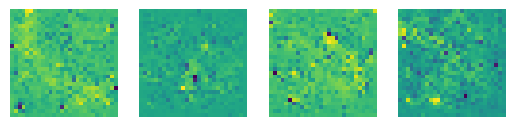

2025-04-08 22:10:48.566946


In [20]:

# This could be useful for recreating this without the weight time

# model.load_state_dict(torch.load("model_weights.path"))

samples = diffusion.sample(batch_size = 4)
print(samples.shape) # (4, 1, 28, 28)


import matplotlib.pyplot as plt

for i, sample in enumerate(samples):
  plt.subplot(1, 4, i + 1)
  plt.imshow(sample.permute(1, 2, 0).cpu().numpy())
  plt.axis("off")

plt.show()

print(datetime.now())

In [3]:
# Use this cell to generate

samples = diffusion.sample(batch_size = 1)
samples.shape # (1, 1, 12, 12)

outFolder = "./Generated/"

for i in range(samples.size(0)):
        # Get the image tensor and convert it to a numpy array
        img_tensor = samples[i]
        img_array = img_tensor.numpy()

        img_array = (img_array * 255).astype(np.uint8)
        print(img_array.shape)
        print(img_array)

        # Convert the numpy array to a PIL Image
        img = Image.fromarray(img_array[0], mode='L')  # 'L' mode for grayscale images

            # Define the file path and save the image
        file_path = os.path.join(outFolder, f'image_0.png')
        img.save(file_path)
        print(f'Saved {file_path}')

            
print(datetime.now())
    

sampling loop time step: 100%|█████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 55.63it/s]

(1, 12, 12)
[[[39 38 38 38 38 38 38 38 38 37 37 38]
  [39 39 39 39 39 39 38 38 38 38 38 38]
  [39 39 38 38 38 38 37 37 36 36 36 36]
  [47 47 47 47 47 47 47 46 46 46 46 46]
  [37 38 37 38 38 38 38 38 38 38 38 38]
  [ 2  2  3  3  3  3  3  3  3  3  3  3]
  [ 0  0  1  1  1  1  1  1  0  0  0  0]
  [ 0  1  1  1  1  1  1  0  0  0  0  0]
  [ 0  1  0  0  0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0  0  0  0  1]
  [ 0  0  0  0  0  0  0  0  0  0  1  1]]]
Saved ./Generated/image_0.png
2025-04-11 15:08:28.384955


In [4]:
# Use this cell to decode the images

# The file to read
filePath = "./Generated/image_0.png"

# The word string
wordString = ""

# 8456 words
dataFile = './ROCS_winter2018.csv'

#############################################################################################
# Open the samples and make the dictionary
#############################################################################################

df = pd.read_csv(dataFile)

print(f"Absobed input data. The shape of the data is {df.shape}")

sent1 = df['InputSentence1']
sent2 = df['InputSentence2']
sent3 = df['InputSentence3']
sent4 = df['InputSentence4']

numSamples = len(sent1)

# This will be explained in more detail later, but these are special words to identify the start and end of sentences
startWord = 'sss'
endWord = 'eee'

# This method will be used to cut to the words of the sentence.
# Keeping apostrophes, but removing other punctuation
def tokenize(text: str) -> List[str]:
    word_re = r"\b[A-Za-z]+(?:'[A-Za-z]+)?\b"
    words = [w.lower() for w in re.findall(word_re, text)]
    return words

example = "He said, 'Isn't O'Brian the best?'"
print(example.split())
print(tokenize(example))

# This method for generating a word bank will use a markov chain
# The research paper used an 11,000 word dictionary, There's only
# about 6000 words in the train data file that I've chosen somehow?

wordBank = {}
wordDictionary = {}

# Word index is what we will use to look up words in the markov matrix
wordIndex = {}
indexIterator = 0
reverseIndex = {}

# Read through all the sentences
for i in range(numSamples):

  sent1Words = tokenize(sent1[i])
  sent2Words = tokenize(sent2[i])
  sent3Words = tokenize(sent3[i])
  sent4Words = tokenize(sent4[i])

  allSentences = [sent1Words, sent2Words, sent3Words, sent4Words]
  for sentence in allSentences:
    for j in range(len(sentence)):
      

      # Count every word, we're going to use the most frequent words
      if sentence[j] not in wordBank:
        wordBank[sentence[j]] = 1
        wordIndex[sentence[j]] = indexIterator
        reverseIndex[indexIterator] = sentence[j]
        indexIterator += 1
      else:
        wordBank[sentence[j]] += 1

# Add the start word and the end word
wordBank[startWord] = 1
wordIndex[startWord] = indexIterator
indexIterator += 1

wordBank[endWord] = 1
wordIndex[endWord] = indexIterator
indexIterator += 1

# For testing
print(f"The length of the wordbank is {len(wordBank)}")
print(f"The length of the word index is {indexIterator}")


#############################################################################################
# Open the image and read the sentence
#############################################################################################
image = Image.open(filePath)

byte_io = io.BytesIO()

image.save(byte_io, format='PNG')

testBytes = image.tobytes()
print(testBytes)


count = 0
firstByte = ""
secondByte = ""
completeByte = ""
foundFirstWord = False
foundFirstZero = False

for byte in testBytes:

    if firstByte == "":
        firstByte = byte << 8
        continue

    else:
        secondByte = byte 
        completeByte = firstByte + secondByte
        
        #print(int(completeByte))
        
        #secondByte = b''

    # The exit condition is if we find two zeros in a row

    if (foundFirstWord == True) and (int(completeByte) == 0):
        if foundFirstZero == False:
           foundFirstZero = True
           firstByte = ""
           continue
        else:
            break

    print(f"First byte: {firstByte}; Second Byte {secondByte}; Complete Byte {completeByte}")

    if completeByte >= len(wordBank):
      wordString = wordString + " " + "JUNK_WORD_OUT_OF_CONTEXT"
    else:
      wordString = wordString + " " + reverseIndex[completeByte]
    
    foundFirstWord = True
    count += 1
    firstByte = ""
    #print(count)


print(wordString)

    
print(datetime.now())
    

Absobed input data. The shape of the data is (3142, 8)
['He', 'said,', "'Isn't", "O'Brian", 'the', "best?'"]
['he', 'said', "isn't", "o'brian", 'the', 'best']
The length of the wordbank is 8456
The length of the word index is 8456
b"'&&&&&&&&%%&''''''&&&&&&''&&&&%%$$$$///////.....%&%&&&&&&&&&\x02\x02\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x00\x00\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x01"
First byte: 9984; Second Byte 38; Complete Byte 10022
First byte: 9728; Second Byte 38; Complete Byte 9766
First byte: 9728; Second Byte 38; Complete Byte 9766
First byte: 9728; Second Byte 38; Complete Byte 9766
First byte: 9728; Second Byte 37; Complete Byte 9765
First byte: 9472; Second Byte 38; Complete Byte 9510
First byte: 9984; Second Byte 39; Complete Byte 10